In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img_file=cv2.imread("Books/intro.jpg")
#cv2.imshow("Image",img_file)
#cv2.waitKey(0)

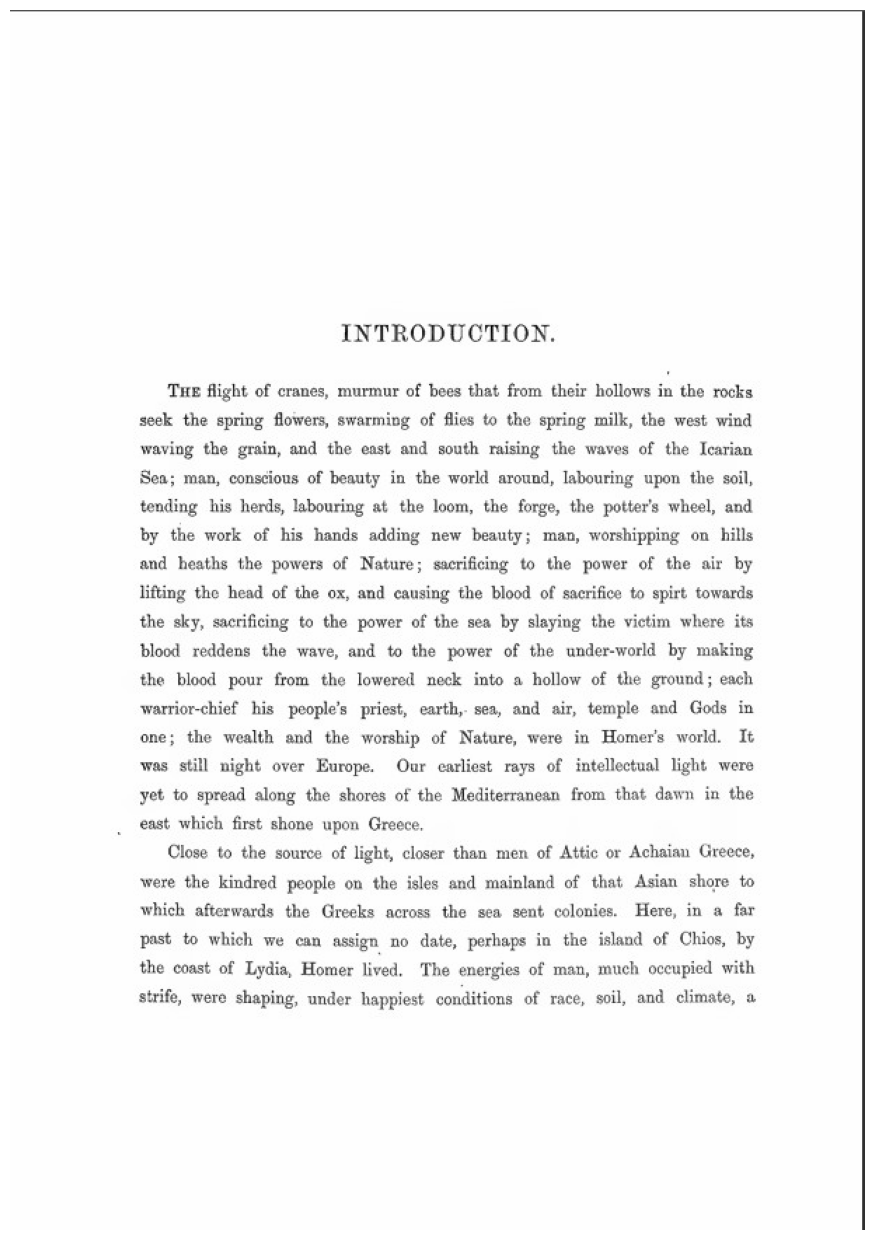

In [5]:
#displaying the image using matplotlib for easier viewing
def display(image):
    img_file=cv2.imread(image)
    height,width= img_file.shape[:2]
    
    dpi=50
    figsize=height/float(dpi),width/float(dpi)
    
    fig=plt.figure(figsize=figsize)
    ax=fig.add_axes([0,0,1,1])
    ax.axis('off')
    
    ax.imshow(img_file,cmap='grey')
    plt.show()
    
display("Books/intro.jpg")

In [6]:
# converting the image to greyscale
def greyscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grey_image=greyscale(img_file)
cv2.imwrite("Books/intro_greyscale.jpg", grey_image)

True

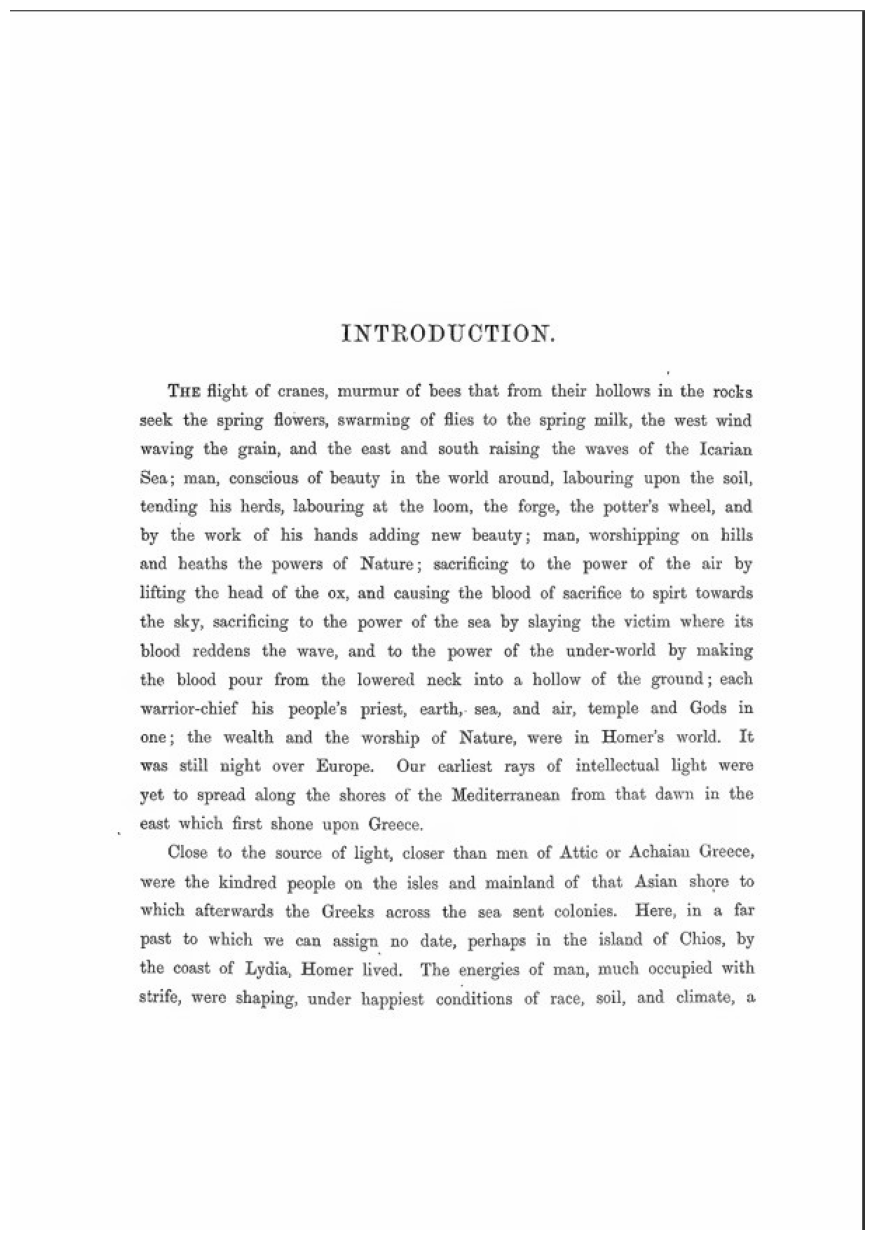

In [7]:
display("Books/intro_greyscale.jpg")

In [8]:
#converting the image to black and white so the text pop-out
thresh, im_bw=cv2.threshold(grey_image, 200 , 230, cv2.THRESH_BINARY)
cv2.imwrite("Books/intro_bw.jpg", im_bw)
#display("Books/intro_bw.jpg")

True

In [9]:
#removing noise from the image
def noise_removal(image):
    kernel=np.ones((1,1), np.uint8)
    
    image=cv2.erode(image, kernel, iterations=1)
    #image=cv2.dilate(image,kernel, iterations=1)
    #image=cv2.erode(image, kernel, iterations=1)
    image=cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    #image=cv2.medianBlur(image,3)
    
    return image

In [10]:
im_wonoise=noise_removal(im_bw)
cv2.imwrite("Books/intro_wonoise.jpg", im_wonoise)
#display("Books/intro_wonoise.jpg")

True

In [11]:
#adjusting font sizes using erosion

def thin_font(image):
    image = cv2.bitwise_not(image)
    kernel= np.ones((1,1), np.uint8)
    
    image=cv2.erode(image, kernel, iterations=1)
    image=cv2.bitwise_not(image)
    return image


In [12]:
im_eroded=thin_font(im_wonoise)
cv2.imwrite("Books/intro_eroded.jpg", im_eroded)
#display("Books/intro_eroded.jpg")

True

In [13]:
#time to thicken the font using dialation

def thick_font(image):
    kernel= np.ones((2,1), np.uint8)
    image=cv2.bitwise_not(image)
    image=cv2.dilate(image, kernel, iterations=1)
    image=cv2.bitwise_not(image)
    return image

In [14]:
im_thick=thick_font(im_eroded)
cv2.imwrite("Books/intro_thick.jpg", im_thick)


True

In [15]:
#display("Books/intro_thick.jpg")

In [16]:
def sharpen(image):
    kernel=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1,]])
    image=cv2.filter2D(image,-1,kernel)
    return image
image_sharpen=sharpen(img_file)
cv2.imwrite("Books/intro_sharp.jpg", image_sharpen)

True

In [17]:
#display("Books/intro_sharp.jpg")

In [18]:
import pytesseract
from PIL import Image

img="Books/intro.jpg"
ocr_img=Image.open(img)


In [19]:
ocr_result= pytesseract.image_to_string(ocr_img)
print(ocr_result)

INTRODUCTION.

Tue flight of cranes, murmur of bees that from their hollows in the rocks
seck the spring flowers, swarming of flies to the spring milk, the west wind
waving the grain, and the east and south raising the waves of the Tcarian
Sea; man, conscious of beauty in the world around, Iabouring upon the soi,
tending his herds, labouring at the loom, the forge, the potter's wheel, and
by the work of his hands adding new beauty; man, worshipping on hills
‘nd heaths the powers of Nature; sacrificing to the power of the air by
lifting the head of the ox, and causing the blood of sacrifice to spirt towards
the sky, sacrificing to the power of the sea by slaying the victim where its
blood reddens the wave, and to the power of the under-world by making
the blood pour from the lowered neck into a hollow of the ground; each
warrior-chief his poople's priost, earth,- sea, and air, temple and Gods in
fone; the wealth and the worship of Nature, were in Homer's world. Tt
‘was still night over 

In [21]:
with open("Books/output.txt", 'w') as file:
    file.write(ocr_result)